In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Added modules

In [ ]:
def get_theta(x, mu, sigma):
    """
    x: fraction of similar neighbours
    mu: optimal fraction of similar neighbours
    sigma: acceptance range
    """
    theta = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    return theta

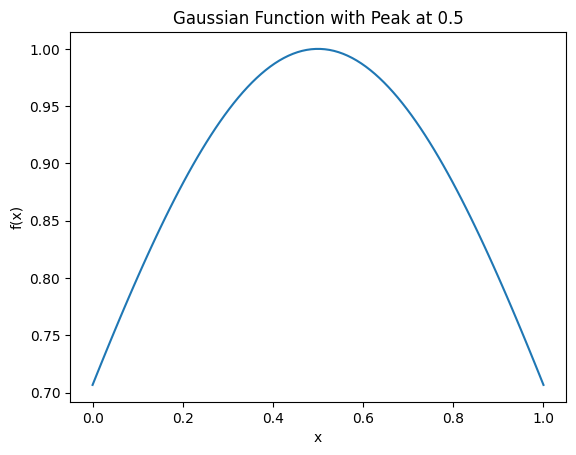

In [8]:
def gaussian_function(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Example usage:
x_values = np.linspace(0, 1, 100)
mu = 0.5  # Peak in the middle
sigma = 0.6  # Controls the width

y_values = gaussian_function(x_values, mu, sigma)

# You can plot the function to visualize it
import matplotlib.pyplot as plt

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Gaussian Function with Peak at {mu}')
plt.show()

# Sobol Sensitivity Analysis

In [42]:
from SALib.sample import saltelli
from SALib.analyze import sobol

In [52]:
import modules as modules
import model as model

# # Create and run the model
model = model.Schelling(
     property_value_func=modules.property_value_quadrants,
     income_func=modules.income_func,
     desirability_func=modules.desirability_func,
     utility_func=modules.utility_func,
     price_func=modules.price_func,
     compute_similar_neighbours=modules.compute_similar_neighbours,
     height=20,
     width=20,
     homophily=0.5,
     radius=1,
     density=0.8,
     minority_pc=0.2,
     alpha=0.5,
     seed=42
 )

/Users/kayamarlenedisselkamp/Desktop/Master - Computational Science/Agent-Based Modelling/ABM-Notebooks-0-1/ABM_Group_3/Mesa Schelling Housing/modules.py:23: UserWarning: Default value 0 (int) might not be best suitable with dtype=float64.
  layer = mesa.space.PropertyLayer(name, width, height, 0)
/Users/kayamarlenedisselkamp/Desktop/Master - Computational Science/Agent-Based Modelling/ABM-Notebooks-0-1/ABM_Group_3/Mesa Schelling Housing/model.py:143: UserWarning: Default value 0.5 (float) might not be best suitable with dtype=float64.
  self.desirability_layer = mesa.space.PropertyLayer("desirability", width, height, 0.5)
/Users/kayamarlenedisselkamp/Desktop/Master - Computational Science/Agent-Based Modelling/ABM-Notebooks-0-1/ABM_Group_3/Mesa Schelling Housing/model.py:149: UserWarning: Default value 0 (int) might not be best suitable with dtype=float64.
  self.interested_agents_layer = mesa.space.PropertyLayer("interested_agents", width, height, 0)
/Users/kayamarlenedisselkamp/Desk

In [53]:
# # Run the model for a certain number of steps
for i in range(5):
     #print(i)
     #print(model.entropy)
     model.step()

# Exemplory use of accessing datacollector
model_data = model.datacollector.get_model_vars_dataframe()
agent_data = model.datacollector.get_agent_vars_dataframe()
print(model_data)
print(agent_data)

                                        Desirability
0  [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,...
              Utility Segregation  Moves
Step AgentID                            
0    1            0.5        None      0
     2            0.5        None      0
     3            0.5        None      0
     4            0.5        None      0
     5            0.5        None      0
...               ...         ...    ...
     318          0.5        None      0
     319          0.5        None      0
     320          0.5        None      0
     321          0.5        None      0
     322          0.5        None      0

[322 rows x 3 columns]


In [49]:
# Step 1: Problem definition
problem = {
    'num_vars': 5,
    'names': ['minority_pc', 'property_value_weight', 'alpha', 'mu_theta', 'sigma_theta'],
    'bounds': [[0,1], [0,1], [0,1], [0,1], [0,1]]
}

In [50]:
# Step 2: Generate the samples (power of 2 for best performance)
samples = saltelli.sample(problem, 2**5) #2024

/var/folders/v9/l1nzr55125v697bcr39l01hr0000gn/T/ipykernel_47071/2465859228.py:2: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  samples = saltelli.sample(problem, 2**5)


In [56]:
# Step 3: Run the model for generated samples
import model
import modules

# First define the model such that it runs for a specified number of time steps in a function 
def run_schelling_model(property_value_func,
                        income_func,
                        desirability_func,
                        utility_func,
                        price_func,
                        compute_similar_neighbours,
                        height,
                        width,
                        homophily,
                        radius,
                        density,
                        minority_pc,
                        alpha,
                        seed,
                        num_steps):
    # Initialize the model
    model_instance = model.Schelling(
        property_value_func=property_value_func,
        income_func=income_func,
        desirability_func=desirability_func,
        utility_func=utility_func,
        price_func=price_func,
        compute_similar_neighbours=compute_similar_neighbours,
        height=height,
        width=width,
        homophily=homophily,
        radius=radius,
        density=density,
        minority_pc=minority_pc,
        alpha=alpha,
        seed=seed
    )

    # Run the model for the specified number of steps
    for i in range(num_steps):
        model_instance.step()

    # Return the model instance or specific results if needed
    return model_instance

In [57]:
# Example of calling the function with specific parameters
model_result = run_schelling_model(
    property_value_func=modules.property_value_quadrants,
    income_func=modules.income_func,
    desirability_func=modules.desirability_func,
    utility_func=modules.utility_func,
    price_func=modules.price_func,
    compute_similar_neighbours=modules.compute_similar_neighbours,
    height=20,
    width=20,
    homophily=0.5,
    radius=1,
    density=0.8,
    minority_pc=0.2,
    alpha=0.5,
    seed=42,
    num_steps=5
)

# If you want to print the entropy at each step, you can modify the function to store the entropies
def run_schelling_model_with_entropy(property_value_func,
                                     income_func,
                                     desirability_func,
                                     utility_func,
                                     price_func,
                                     compute_similar_neighbours,
                                     height,
                                     width,
                                     homophily,
                                     radius,
                                     density,
                                     minority_pc,
                                     alpha,
                                     seed,
                                     num_steps):
    # Initialize the model
    model_instance = model.Schelling(
        property_value_func=property_value_func,
        income_func=income_func,
        desirability_func=desirability_func,
        utility_func=utility_func,
        price_func=price_func,
        compute_similar_neighbours=compute_similar_neighbours,
        height=height,
        width=width,
        homophily=homophily,
        radius=radius,
        density=density,
        minority_pc=minority_pc,
        alpha=alpha,
        seed=seed
    )

    # Run the model for the specified number of steps and collect entropy values
    entropies = []
    for i in range(num_steps):
        model_instance.step()
        entropies.append(model_instance.entropy)

    # Return the model instance and entropy values
    return model_instance, entropies

# Example of calling the modified function
model_result, entropy_values = run_schelling_model_with_entropy(
    property_value_func=modules.property_value_quadrants,
    income_func=modules.income_func,
    desirability_func=modules.desirability_func,
    utility_func=modules.utility_func,
    price_func=modules.price_func,
    compute_similar_neighbours=modules.compute_similar_neighbours,
    height=20,
    width=20,
    homophily=0.5,
    radius=1,
    density=0.8,
    minority_pc=0.2,
    alpha=0.5,
    seed=42,
    num_steps=5
)

# Print the entropy values
print("Entropy values at each step:", entropy_values)

/Users/kayamarlenedisselkamp/Desktop/Master - Computational Science/Agent-Based Modelling/ABM-Notebooks-0-1/ABM_Group_3/Mesa Schelling Housing/modules.py:23: UserWarning: Default value 0 (int) might not be best suitable with dtype=float64.
  layer = mesa.space.PropertyLayer(name, width, height, 0)
/Users/kayamarlenedisselkamp/Desktop/Master - Computational Science/Agent-Based Modelling/ABM-Notebooks-0-1/ABM_Group_3/Mesa Schelling Housing/model.py:143: UserWarning: Default value 0.5 (float) might not be best suitable with dtype=float64.
  self.desirability_layer = mesa.space.PropertyLayer("desirability", width, height, 0.5)
/Users/kayamarlenedisselkamp/Desktop/Master - Computational Science/Agent-Based Modelling/ABM-Notebooks-0-1/ABM_Group_3/Mesa Schelling Housing/model.py:149: UserWarning: Default value 0 (int) might not be best suitable with dtype=float64.
  self.interested_agents_layer = mesa.space.PropertyLayer("interested_agents", width, height, 0)
/Users/kayamarlenedisselkamp/Desk

Entropy values at each step: [0.8401748292288767, 0.8785912165957929, 0.8624263301000882, 0.848328487716169, 0.842077541040719]


In [ ]:
print(model)